# TPK4170 Robotics - Trajectory Generation
## 2016-09-29
### Lars Tingelstad

# Introduction

## Definitions of Path and Trajectory

### [Corke - Robotics, Vision and Control:](http://link.springer.com/book/10.1007%2F978-3-642-20144-8) 

A **path is a spatial construct** – a locus in space that leads from an initial pose to a final pose. A **trajectory is a path with specified timing**. For example there is a path from A to B, but there is a trajectory from A to B in $10\ \rm s$ or at $2\ \rm m/ \rm s$.

### [Siciliano et. al. - Robotics: ](http://link.springer.com/book/10.1007/978-1-84628-642-1)

A **path denotes the locus of points** in the **joint space**, or in the **operational space**, which the manipulator has to follow in the execution of the assigned motion; **a path is then a pure geometric description of motion**. On the other hand, **a trajectory is a path on which a timing law is specified**, for instance in terms of velocities and/or accelerations at each point.

#### Locus

In geometry, a locus (plural: loci) (Latin word for "place", "location") is a set of points (commonly, a line, a line segment, a curve or a surface), whose location satisfies or is determined by one or more specified conditions.

#### Joint Space 

The joint space (configuration space) denotes the space in which the $(n \times 1)$ vector
of joint variables
$$\boldsymbol{\mathrm{q}} = \begin{pmatrix} q_1\\ \vdots \\ q_n \end{pmatrix}$$ is defined; it is $q_i = \theta_i$ for a revolute joint and $q_i = d_i$ for a prismatic joint.

#### Operational Space 

Operational space is the space in which the manipulator task is specified, typically $\mathbb{R}^3$. A position and orientation can then be described by, e.g., a $(6 \times 1)$ vector $\boldsymbol{\mathrm{x}}_e$ of positions $\boldsymbol{\mathrm{p}}_e$ and Euler angles $\boldsymbol{\mathrm{\phi}}_e$ where
$$\boldsymbol{\mathrm{x}}_e = \begin{pmatrix} \boldsymbol{\mathrm{p}}_e \\\boldsymbol{\mathrm{\phi}}_e \end{pmatrix}.$$

## Examples 
### Standard Trajectory Generation

In [1]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/pIcxOGo7ieU" frameborder="0" allowfullscreen></iframe>

### Online Trajectory Generation

#### Tracking a Swinging Target with a Robot Manipulator using Visual Sensing

**Description from YouTube:**

In [2]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/0EAKonCFusg" frameborder="0" allowfullscreen></iframe>

#### Collision Avoidance Using the [Reflexxes Motion Libraries](http://www.reflexxes.ws/)

**Interactive notebook:**[![Binder](http://mybinder.org/badge.svg)](http://mybinder.org:/repo/tingelst/rmltypeii)

In [3]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/yLNDN0N8DRE" frameborder="0" allowfullscreen></iframe>

#### The Duel: Timo Boll vs. KUKA Robot

In [4]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/tIIJME8-au8" frameborder="0" allowfullscreen></iframe>

# Joint Space Trajectories

A manipulator motion is typically assigned in the operational space in terms of trajectory parameters such as
- the initial and final end-effector pose
- possible intermediate poses
- travelling time along particular geometric paths.

If it is desired to plan a trajectory in the joint space, the values of the joint variables have to be determined first from the end-effector position and orientation specified by the user. It is then necessary to resort to an inverse kinematics algorithm

The planning algorithm generates a function $\boldsymbol{\mathrm{q}}(t)$ interpolating the given vectors of joint variables at each point, in respect of the imposed constraints. 

In general, a joint space trajectory planning algorithm is required to have
the following features:
 - the generated trajectories should be not very demanding from a computational viewpoint,
 - the joint positions and velocities should be continuous functions of time (continuity of accelerations may be imposed, too),
 - undesirable effects should be minimized, e.g., nonsmooth trajectories interpolating a sequence of points on a path


## Point-to-Point Motion


In *point-to-point motion*, the manipulator has to move from an initial joint configuration $\boldsymbol{\mathrm{q}}_i$ to a final joint configuration $\boldsymbol{\mathrm{q}}_f$ in a given time $t_f$, that is, 
$$\boldsymbol{\mathrm{q}}(0) = \boldsymbol{\mathrm{q}}_i$$
and 
$$\boldsymbol{\mathrm{q}}(t_f) = \boldsymbol{\mathrm{q}}_f.$$

In this case, the actual end-effector path is of no concern. 

In the following we consider point-to-point motion of a single joint with position $q(t)$, velocity $\dot q(t)$ and acceleration $\ddot q(t)$.

### Cubic Polynomials

A **joint-space trajectory** can be generated using a **cubic (third-order) polynomial**.

The position $q(t)$ is given by the polynomial 
$$ q(t) = a_3 t^3 + a_2 t^2 + a_1 t + a_0$$
which results in a parabolic velocity profile
$$\dot{q}(t) = 3 a_3 t^2 + 2 a_2 t + a_1$$
and a linear acceleration profile
$$\ddot{q}(t) = 6 a_3 t + 2 a_2.$$

The polynomial $q(t)$ has four coeffiecients, $a_3, a_2, a_1, a_0$. It is then possible to impose constraints on the initial position $q(0) = q_i$, the final position $q(t_f) = q_f$, the initial velocity  $\dot q(0) = \dot q_i$ and the final velocity $\dot q(tf) = \dot q_f$. The initial and final joint velocity values $q_i$ and $q_f$ are usually set to zero.

In [31]:
qi = 0 % Initital position
qf = pi % Final position
dqi = 0 % Initial velocity
dqf = 0 % Final velocity
t = 2 % Duration of the motion

qi = 0
qf =  3.1416
dqi = 0
dqf = 0
t =  2


Determination of a specific trajectory is given by the solution to the following system of equations:
\begin{align}
a_0 &= q_i \\
a_3 t_f^3 + a_2 t_f^2 + a_1 t_f + a_0 &= q_f \\
a_1 &= \dot{q}_i \\
3 a_3 t_f^2 + 2 a_2 t_f + a_1 &= \dot{q}_f,
\end{align}
which can be written in matrix form as:
\begin{align}
\begin{pmatrix} q_i \\ q_f \\ \dot q_i \\ \dot q_f \end{pmatrix} =
\begin{pmatrix} 
  0 & 0 & 0 & 1 \\ 
  t^3 & t^2 & t & 1 \\ 
  0 & 0 & 1 & 0 \\ 
  3t^2 & 2t & 1 & 0
  \end{pmatrix} 
  \begin{pmatrix} a_3 \\ a_2 \\ a_1 \\ a_0 \end{pmatrix}.
\end{align}
Since the matrix is square we can solve for the coefficient vector $(a_3, a_2, a_1, a_0)^\top$ using standard linear algebra methods.

We form the matrix
$$ \boldsymbol{\mathrm{A}} = 
\begin{pmatrix} 
  0 & 0 & 0 & 1 \\ 
  t^3 & t^2 & t & 1 \\ 
  0 & 0 & 1 & 0 \\ 
  3t^2 & 2t & 1 & 0
  \end{pmatrix}.
$$

In [32]:
A = [0, 0, 0, 1;
     t^3, t^2, t, 1;
     0, 0, 1, 0;
     3 * t^2, 2 * t, 1.0, 0.0]

A =

    0    0    0    1
    8    4    2    1
    0    0    1    0
   12    4    1    0



We then form the vector $$\boldsymbol{\mathrm{b}} = \begin{pmatrix} q_i \\ q_f \\ \dot q_i \\ \dot q_f \end{pmatrix}.$$

In [33]:
b = [qi, qf, dqi, dqf]'

b =

   0.00000
   3.14159
   0.00000
   0.00000



We then solve for the polynomial coeffiecient vector 
$$\boldsymbol{\mathrm{p}} = \begin{pmatrix} a_3 \\ a_2 \\ a_1 \\ a_0 \end{pmatrix}.$$

In [34]:
p = A \ b

p =

  -0.78540
   2.35619
   0.00000
   0.00000



#### Position
The positions $q(t)$ can then be found by evaluating the polynomial
$$ q(t) = a_3 t^3 + a_2 t^2 + a_1 t + a_0.$$

In [35]:
ts = [0:0.01:t];
qs = polyval(p, ts);

The positions $q(t)$ can be plotted:

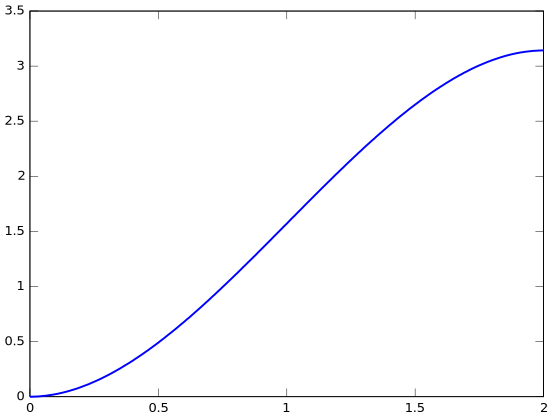

In [36]:
%plot inline -f 'svg'
plot(ts, qs, 'linewidth',2)

The velocities $\dot q(t)$ can be found by evaluating
$$\dot{q}(t) = 3 a_3 t^2 + 2 a_2 t + a_1.$$

In [37]:
dqs = polyval([3 * p(1), 2 * p(2), p(3)],ts);

The velocities $\dot q(t)$ can be plotted:

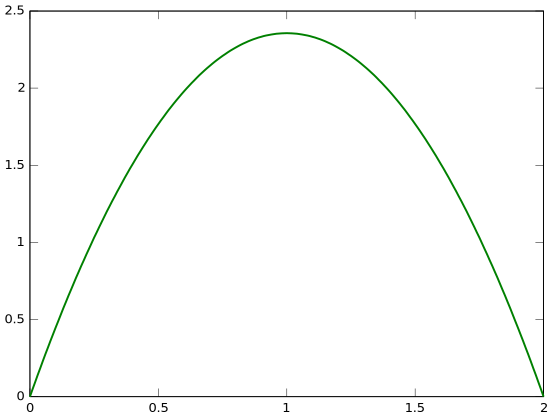

In [38]:
plot(ts, dqs, 'linewidth',2, 'color',[0,0.5,0])

The accelerations $\ddot q(t)$ can found by evaluating
$$\ddot{q}(t) = 6 a_3 t + 2 a_2.$$

In [39]:
ddqs = polyval([6 * p(1), 2 * p(2)],ts);

The accelerations $\ddot q(t)$ can be plotted:

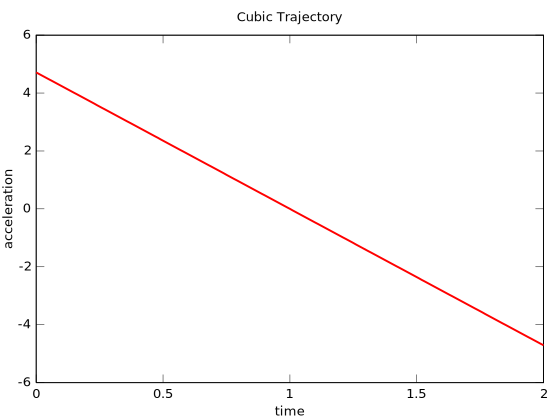

In [40]:
plot(ts, ddqs, 'linewidth', 2, 'color', 'r')
title ("Cubic Trajectory");
xlabel ("time");
ylabel ("acceleration");

We can also create a function that returns the trajectory

In [41]:
function [ts, qs, dqs, ddqs] = cubic_trajectory(qi, qf, dqi, dqf, t)
    b = [qi, qf, dqi, dqf]';
    A = [0, 0, 0, 1;
         t^3, t^2, t, 1;
         0, 0, 1, 0;
         3 * t^2, 2 * t, 1.0, 0.0];
    p = A \ b;
    ts = [0:0.01:t];
    qs = polyval(p, ts);
    dqs = polyval([3 * p(1), 2 * p(2), p(3)],ts);
    ddqs = polyval([6 * p(1), 2 * p(2)],ts);
end

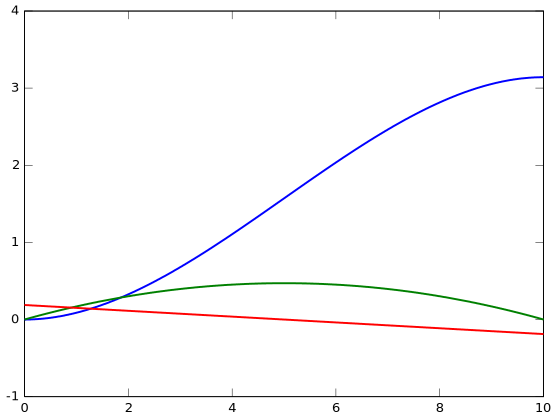

In [26]:
[ts, qs, dqs, ddqs] = cubic_trajectory(0, pi, 0, 0, 10);
plot(ts,qs, 'linewidth', 2, ts,dqs, 'linewidth', 2, ts, ddqs, 'linewidth', 2)

### Quintic Polynomials
If it is desired to assign also the initial and final values of acceleration, six constraints have to be satisfied and then a polynomial of at least fifth-order is needed. The motion timing law for the generic joint is then given by
\begin{align}
q(t) &= a_5 t^5 + a_4 t^4 + a_3 t^3 + a_2 t^2 + a_1 t + a_0 \\
\dot{q}(t) &= 5 a_5 t^4 + 4 a_4 t^3 + 3  a_3 t^2 + 2 a_2 t + a_1 \\
\ddot{q}(t) &= 20 a_5 t^3 + 12 a_4 t^2 + 6 a_3 t + 2 a_2.
\end{align}

This can be written in matrix form as
\begin{align}
\begin{pmatrix} q_i \\ q_f \\ \dot q_i \\ \dot q_f \\ \ddot q_i \\ \ddot q_f \end{pmatrix} =
\begin{pmatrix} 
  0 & 0 & 0 & 0 & 0 & 1 \\ 
  t^5 & t^4 & t^3 & t^2 & t & 1 \\ 
  0 & 0 & 0 & 0 & 1 & 0 \\ 
  5t^4 & 4t^3 & 3t^2 & 2t & 1 & 0 \\
  0 & 0 & 0 & 2 & 0 & 0 \\  
  20t^3 & 12t^2 & 6t & 2 & 0 & 0
  \end{pmatrix} 
  \begin{pmatrix}a_5 \\ a_4 \\ a_3 \\ a_2 \\ a_1 \\ a_0 \end{pmatrix}.
\end{align}

In [49]:
qi = 0;
qf = 1;
dqi = 0.0;
dqf = 0;
ddqi = 0;
ddqf = 0;
t = 50;
ts = [0:0.01:t];

In [50]:
A = [0, 0, 0, 0, 0, 1;
     t^5, t^4, t^3, t^2, t, 1;
     0, 0, 0, 0, 1, 0;
     5*t^4, 4*t^3, 3*t^2, 2*t, 1, 0;
     0, 0, 0, 2, 0, 0;
     20*t^3, 12*t^2, 6*t, 2, 0, 0]

A =

           0           0           0           0           0           1
   312500000     6250000      125000        2500          50           1
           0           0           0           0           1           0
    31250000      500000        7500         100           1           0
           0           0           0           2           0           0
     2500000       30000         300           2           0           0



In [51]:
b = [qi, qf, dqi, dqf, ddqi, ddqf]'

b =

   0
   1
   0
   0
   0
   0



In [52]:
p = A \ b

p =

   1.9200e-08
  -2.4000e-06
   8.0000e-05
   0.0000e+00
   0.0000e+00
   0.0000e+00



## Position

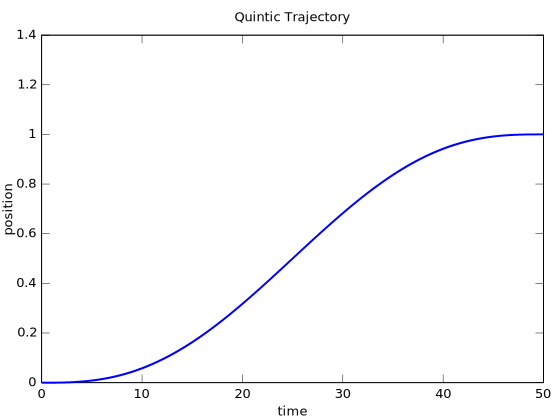

In [53]:
%plot inline -f 'svg'
plot(ts, polyval(p, ts), 'linewidth',2);
title ("Quintic Trajectory");
xlabel ("time");
ylabel ("position");

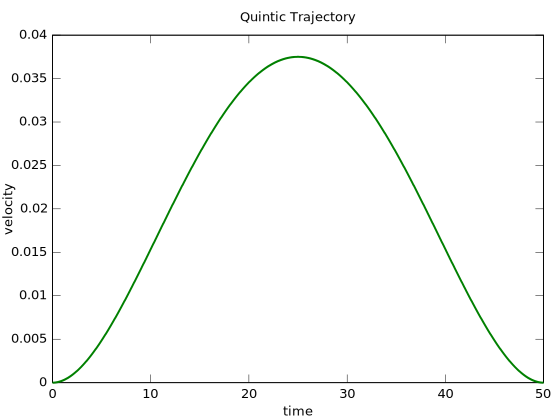

In [54]:
plot(ts, polyval([5 * p(1), 4 * p(2), 3 * p(3), 2 * p(4), p(5)], ts), 
     'linewidth', 2, 'color', [0, 0.5, 0])
title ("Quintic Trajectory");
xlabel ("time");
ylabel ("velocity");

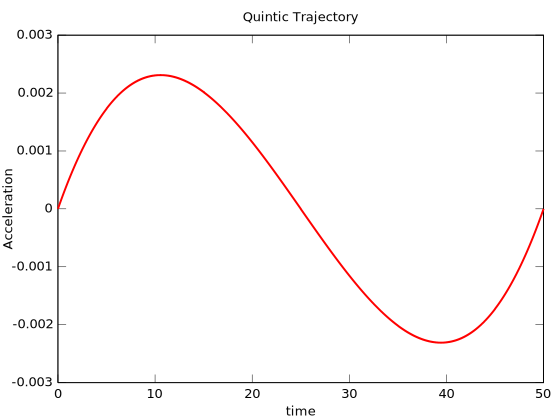

In [55]:
plot(ts, polyval([20 * p(1), 12 * p(2), 6 * p(3), 2 * p(4)], ts),
'linewidth',2, 'color', [1,0,0])
title ("Quintic Trajectory");
xlabel ("time");
ylabel ("Acceleration");